In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [2]:
df=pd.read_csv('chicago_hours.csv',sep=',',delimiter=',',low_memory=False)

In [3]:
d=pd.read_csv('Crimes_-_2022.csv',sep=',',delimiter=',',low_memory=False)

In [4]:
c=pd.read_csv('CA_clust.csv')
c.head()

,CommunityArea,Ethn
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [5]:
c = c.rename(columns={'CommunityArea': 'Community Area'})
df= df.merge(c, on='Community Area', how='left')



NameError: name 'df_merged' is not defined

In [7]:
df['District']=d['District']

In [8]:
df=df.iloc[:,1:]
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Community Area,Latitude,Longitude,Month,Day,Hour,Ethn,District
0,08/09/2022 04:07:00 PM,014XX W ELMDALE AVE,ROBBERY,VEHICULAR HIJACKING,STREET,True,False,48.0,77,41.990846,-87.666096,8.0,9.0,16.0,1,20
1,08/10/2022 04:00:00 PM,062XX S ARTESIAN AVE,THEFT,OVER $500,STREET,False,False,16.0,66,41.780331,-87.684892,8.0,10.0,16.0,2,8
2,08/11/2022 10:00:00 AM,094XX S STATE ST,THEFT,OVER $500,STREET,False,True,9.0,49,41.722303,-87.623745,8.0,11.0,10.0,3,6
3,08/15/2022 09:14:00 PM,048XX S KARLOV AVE,ASSAULT,SIMPLE,RESIDENCE,False,False,14.0,57,41.805347,-87.725961,8.0,15.0,21.0,2,8
4,08/16/2022 04:10:00 PM,015XX S HALSTED ST,THEFT,$500 AND UNDER,SIDEWALK,False,False,11.0,28,41.860250,-87.646715,8.0,16.0,16.0,1,12


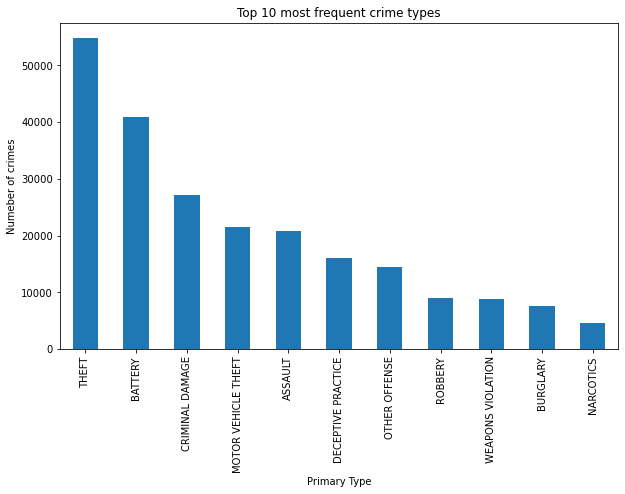

In [9]:
top_10_types = df['Primary Type'].value_counts().nlargest(11)
plt.figure(figsize=(10, 6))
top_10_types.plot(kind='bar')
plt.xlabel('Primary Type')
plt.ylabel('Numeber of crimes')
plt.title('Top 10 most frequent crime types')
plt.show()


In [10]:
df = df[df['Primary Type'].isin(top_10_types.index)]

In [11]:
df.describe(include='all')

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Community Area,Latitude,Longitude,Month,Day,Hour,Ethn,District
count,225721,225721,225721,225721,224945,225721,225721,225713.000000,225721.000000,220801.000000,220801.000000,225721.000000,225721.000000,225721.000000,225721.000000,225721.000000
unique,107044,27656,11,189,103,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,01/01/2022 12:00:00 AM,001XX N STATE ST,THEFT,SIMPLE,STREET,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,88,586,54757,26880,65664,201362,185621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.329932,36.288936,41.845195,-87.668189,6.843559,15.709761,12.365433,2.043058,11.286128
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.211177,21.509889,0.088838,0.060601,3.327732,8.864064,6.968229,0.905328,7.075099
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,36.619446,-91.686566,1.000000,1.000000,0.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,22.000000,41.768866,-87.709804,4.000000,8.000000,8.000000,1.000000,5.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,32.000000,41.862218,-87.661202,7.000000,16.000000,13.000000,2.000000,10.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,53.000000,41.908569,-87.626310,10.000000,23.000000,18.000000,3.000000,17.000000


In [12]:
intervalli = [0, 8, 16, 23]

# Definisci le etichette per i valori trasformati
etichette = [1, 2, 3]

# Utilizza pd.cut() per trasformare la colonna 'Hour'
df['Time'] = pd.cut(df['Hour'], bins=intervalli, labels=etichette, include_lowest=True)

# Visualizza il dataframe con la colonna trasformata
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Community Area,Latitude,Longitude,Month,Day,Hour,Ethn,District,Time
0,08/09/2022 04:07:00 PM,014XX W ELMDALE AVE,ROBBERY,VEHICULAR HIJACKING,STREET,True,False,48.0,77,41.990846,-87.666096,8.0,9.0,16.0,1,20,2
1,08/10/2022 04:00:00 PM,062XX S ARTESIAN AVE,THEFT,OVER $500,STREET,False,False,16.0,66,41.780331,-87.684892,8.0,10.0,16.0,2,8,2
2,08/11/2022 10:00:00 AM,094XX S STATE ST,THEFT,OVER $500,STREET,False,True,9.0,49,41.722303,-87.623745,8.0,11.0,10.0,3,6,2
3,08/15/2022 09:14:00 PM,048XX S KARLOV AVE,ASSAULT,SIMPLE,RESIDENCE,False,False,14.0,57,41.805347,-87.725961,8.0,15.0,21.0,2,8,3
4,08/16/2022 04:10:00 PM,015XX S HALSTED ST,THEFT,$500 AND UNDER,SIDEWALK,False,False,11.0,28,41.860250,-87.646715,8.0,16.0,16.0,1,12,2


In [70]:
# 'Block', , 'District' 
variables=[ 'Primary Type','Ethn', 'Time', 'District' ]
target=['Arrest']

In [71]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Trasformazione della colonna 'Block'
df['Block'] = label_encoder.fit_transform(df['Block'])
df['Block'] = df['Block'].astype('category')

# Trasformazione della colonna 'Primary Type'
df['Primary Type'] = label_encoder.fit_transform(df['Primary Type'])
df['Primary Type'] = df['Primary Type'].astype('category')
df['Arrest'] = label_encoder.fit_transform(df['Arrest'])
df['Ethn']=df['Ethn'].astype('category')
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Community Area,Latitude,Longitude,Month,Day,Hour,Ethn,District,Time
0,08/09/2022 04:07:00 PM,6014,8,VEHICULAR HIJACKING,STREET,1,False,48.0,77,41.990846,-87.666096,8.0,9.0,16.0,1,20,2
1,08/10/2022 04:00:00 PM,21023,9,OVER $500,STREET,0,False,16.0,66,41.780331,-87.684892,8.0,10.0,16.0,2,8,2
2,08/11/2022 10:00:00 AM,25545,9,OVER $500,STREET,0,True,9.0,49,41.722303,-87.623745,8.0,11.0,10.0,3,6,2
3,08/15/2022 09:14:00 PM,17106,0,SIMPLE,RESIDENCE,0,False,14.0,57,41.805347,-87.725961,8.0,15.0,21.0,2,8,3
4,08/16/2022 04:10:00 PM,6289,9,$500 AND UNDER,SIDEWALK,0,False,11.0,28,41.860250,-87.646715,8.0,16.0,16.0,1,12,2


In [110]:
df.to_csv('final.csv')

In [72]:
test_set = df.groupby('Primary Type').head(1000)

# Rimuovi le righe del test set dal dataframe originale per ottenere il training set
train_set = df.drop(test_set.index)

print(test_set['Primary Type'].value_counts())

# Verifica il numero di righe per ogni tipo di 'Primary Type' nel training set
print(train_set['Primary Type'].value_counts())

0     1000
1     1000
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
Name: Primary Type, dtype: int64
9     53757
1     39887
3     26233
5     20435
0     19784
4     15106
7     13521
8      7969
10     7766
2      6595
6      3668
Name: Primary Type, dtype: int64


In [73]:
X_train, X_test, y_train, y_test=train_set[variables],test_set[variables], train_set[target], test_set[target]

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a Decision Tree model
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train, np.ravel(y_train))

# Create a Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, np.ravel(y_train))


RandomForestClassifier()

In [75]:
from sklearn.metrics import accuracy_score

# Predict using the Decision Tree model
dt_predictions = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Predict using the Random Forest model
rf_predictions = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Compare the accuracies
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Decision Tree Accuracy: 0.8134545454545454
Random Forest Accuracy: 0.9019090909090909


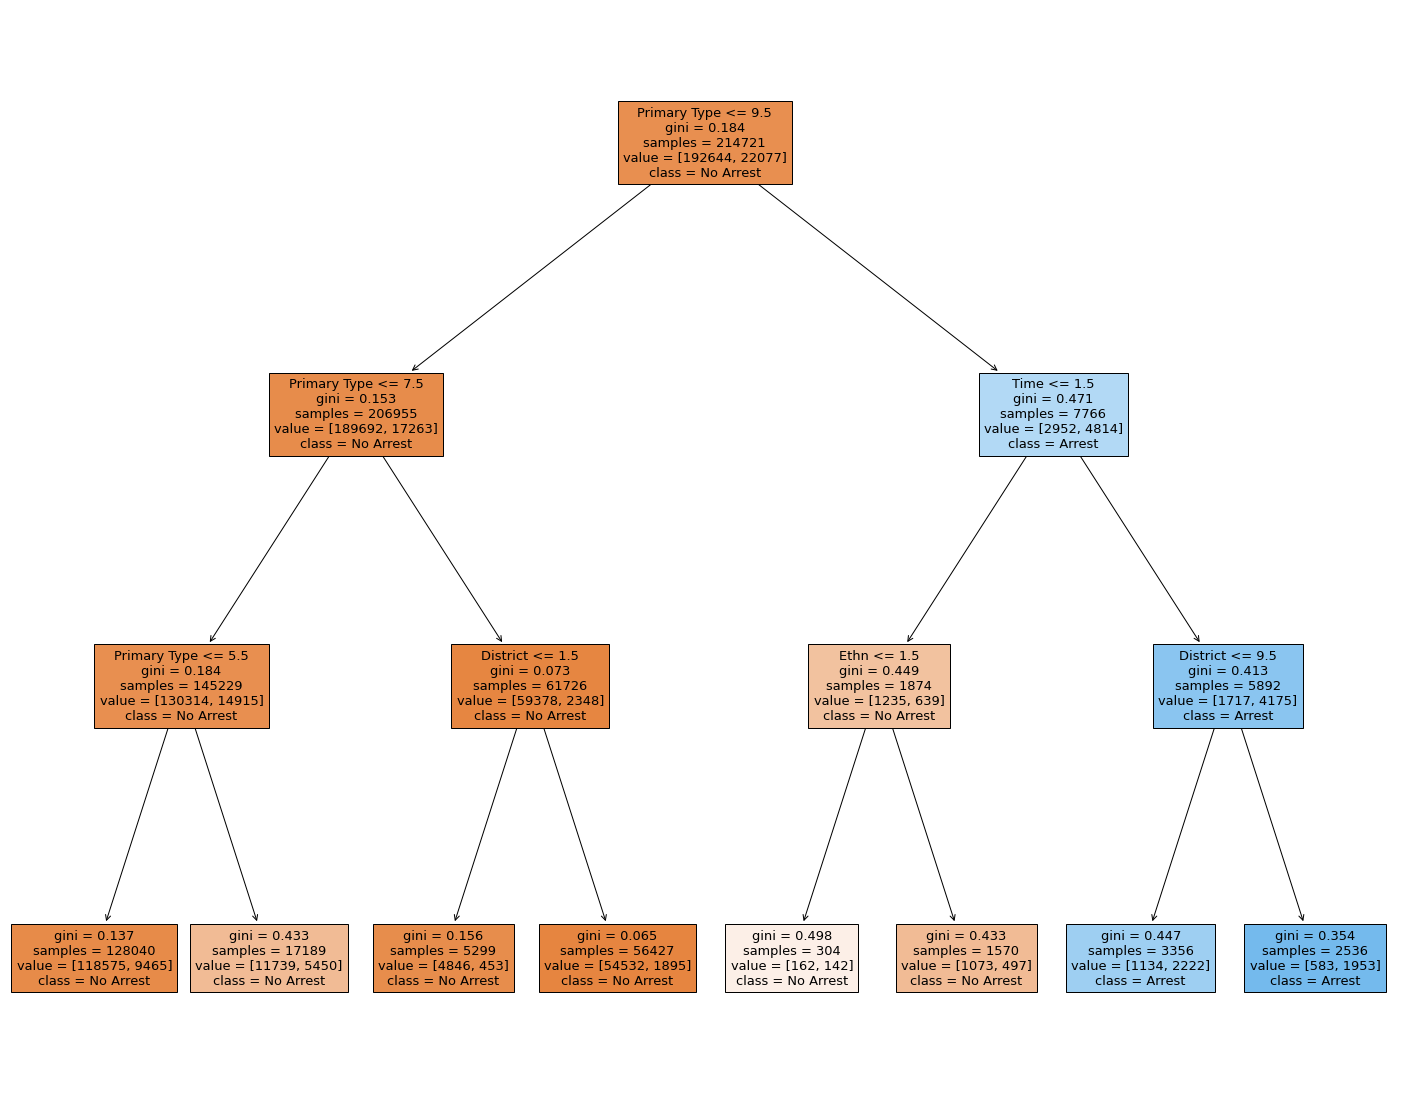

In [76]:
#DO NOT RUN
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, feature_names=variables,class_names=['No Arrest','Arrest'],filled=True)
fig.savefig("decistion_tree.png")

In [109]:
import pandas as pd

# Create the dataset
data = {
    'Unemployment': [10.5, 12.3, 13.8, 16.7, 14.9, 9.8, 18.2, 17.1, 8.7, 14.1, 15.9, 11.2, 19.5, 10.9, 13.4, 16.2, 15.1, 11.8, 17.3, 14.5, 12.7, 10.3, 13.6, 15.7, 14.3, 17.8, 12.9, 16.6, 18.9, 11.5, 19.3, 15.5, 9.5, 13.1, 16.4, 14.7, 18.6, 10.7, 12.1, 17.5, 15.3, 19.1, 8.9, 13.9, 11.9, 16.0, 14.0, 17.9, 12.5, 10.1, 15.6, 19.4, 13.0, 18.0, 9.9, 12.2, 16.3, 14.2, 17.7, 11.6, 19.7, 15.8, 9.4, 13.2, 16.5, 14.6, 18.7, 11.0, 19.2, 15.4, 9.8, 13.3, 16.6, 14.4, 18.5, 11.7, 19.6],
    'Below.Poverty.Level': [20.7, 19.4, 22.1, 21.0, 18.5, 19.8, 17.2, 16.6, 20.4, 18.9, 20.1, 21.8, 17.6, 19.1, 22.7, 18.2, 19.5, 21.5, 16.8, 17.9, 19.3, 20.9, 18.6, 22.3, 17.4, 20.0, 19.2, 17.8, 19.9, 22.9, 21.7, 18.4, 17.0, 19.6, 21.4, 18.8, 22.5, 20.6, 19.0, 16.4, 17.7, 20.3, 18.3, 22.4, 21.1, 20.2, 16.9, 19.7, 22.0, 17.3, 21.3, 19.7, 20.7, 19.4, 22.1, 21.0, 18.5, 19.8, 17.2, 16.6, 20.4, 18.9, 20.1, 21.8, 17.6, 19.1, 22.7, 18.2, 19.5, 21.5, 16.8, 17.9, 19.3, 20.9, 18.6, 22.3, 17.4, 20.0, 19.2],
    'Ethn': ['Safe', 'Safe', 'Safe', 'Dangerous', 'Neutral', 'Safe', 'Dangerous', 'Dangerous', 'Safe', 'Safe', 'Neutral', 'Safe', 'Dangerous', 'Safe', 'Neutral', 'Neutral', 'Safe', 'Neutral', 'Dangerous', 'Safe', 'Neutral', 'Neutral', 'Safe', 'Neutral', 'Safe', 'Dangerous', 'Dangerous', 'Dangerous', 'Neutral', 'Dangerous', 'Neutral', 'Safe', 'Safe', 'Neutral', 'Neutral', 'Dangerous', 'Dangerous', 'Dangerous', 'Neutral', 'Safe', 'Neutral', 'Neutral', 'Dangerous', 'Dangerous', 'Dangerous', 'Neutral', 'Neutral', 'Safe', 'Dangerous', 'Neutral', 'Neutral', 'Neutral', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe']
}

df = pd.DataFrame(data)

# Separate the features and target variable
X = df[['Unemployment', 'Below.Poverty.Level']]
y = df['Ethn']


ValueError: arrays must all be same length

In [108]:
len(data['Below.Poverty.Level'])

102

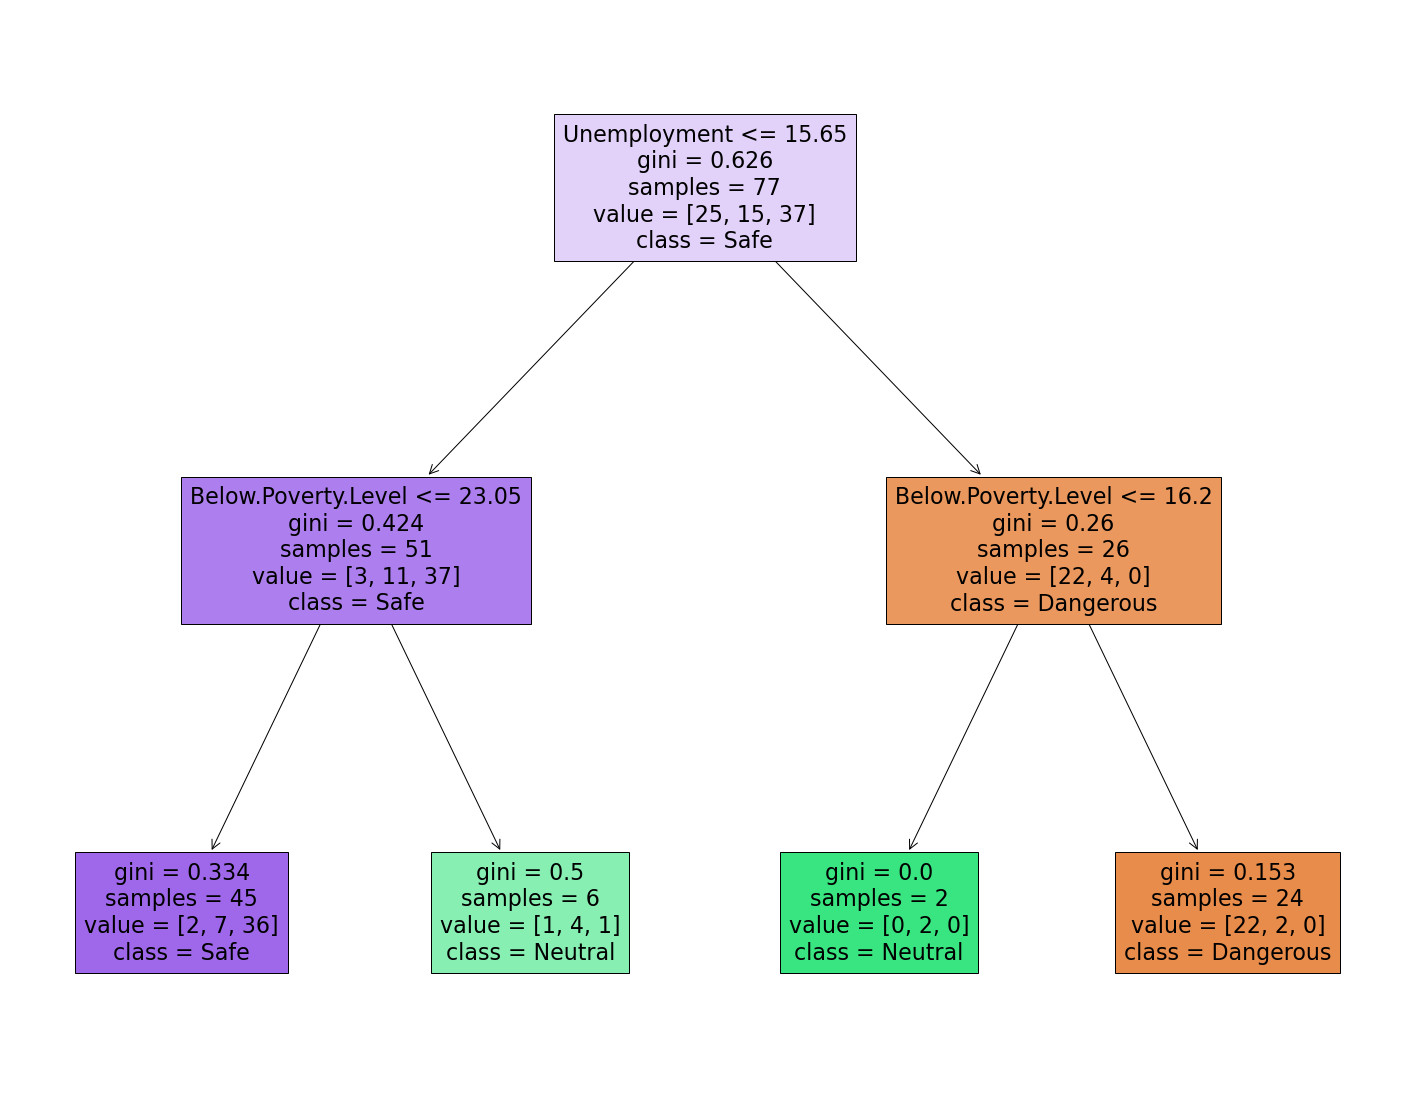

In [98]:
decision_tree2 = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the decision tree on the dataset
decision_tree2.fit(Xt, yt)
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(decision_tree2, feature_names=Xt.columns,class_names=['Dangerous','Neutral', 'Safe'],filled=True)
fig.savefig("decistion_tree2.png")